## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlalchemy
import matplotlib.pyplot as plt

In [7]:
engine = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3308/iris')

## Loading Data

In [8]:
df = pd.read_sql_table('data',engine,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Preprocessing the data

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

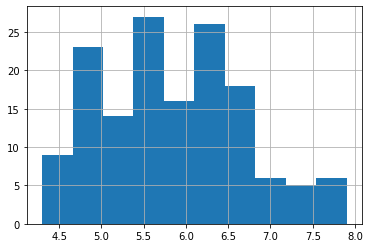

In [13]:
df['SepalLengthCm'].hist()

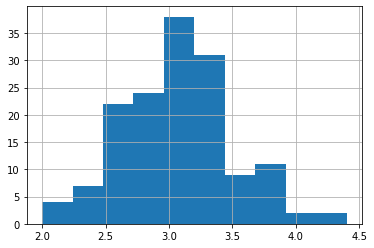

In [14]:
df["SepalWidthCm"].hist()
# Data is in Normal distribution. Which will result in fast predection

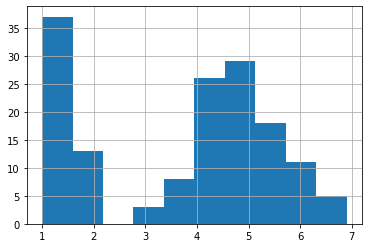

In [15]:
df["PetalLengthCm"].hist()
# We can see two clusters of data

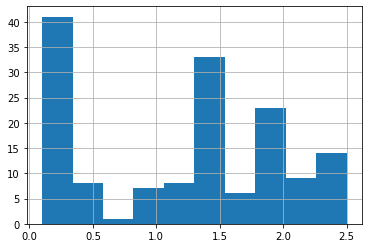

In [16]:
df["PetalWidthCm"].hist()

In [17]:
colors = ['red','green','blue']
species = ['Iris-versicolor','Iris-setosa','Iris-virginica']

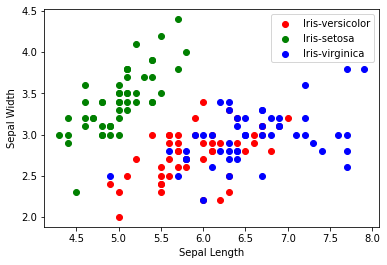

In [18]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

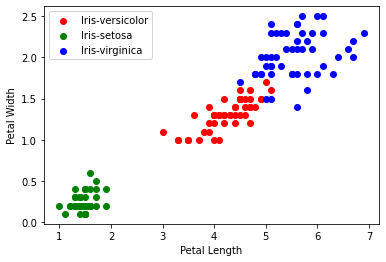

In [19]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

## Coorelation Metrix

In [22]:
# If there is a high co-relation between 2 features, then we use just a one feature instead of both
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [23]:
corr = df.corr()

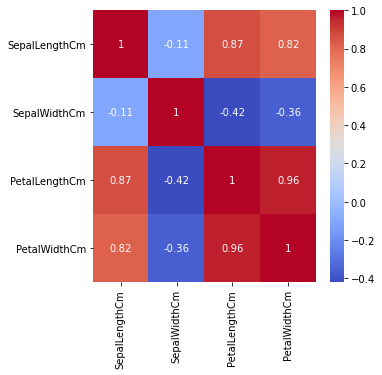

In [24]:
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, ax = ax, cmap="coolwarm")

## Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
# Convert all 3 lables to 0, 1, 2
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## Model Training

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('Species',axis=1)
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
print("Accuracy", model.score(x_test,y_test) * 100)

Accuracy 100.0


## K-Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [33]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
print("Accuracy", model.score(x_test,y_test) * 100)

Accuracy 100.0


## Decession Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [36]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
print("Accuracy", model.score(x_test,y_test) * 100)

Accuracy 100.0


## PREDICTIONS

In [38]:
testData = np.array([10,5,5,2]).reshape(1,4)

In [39]:
model.predict(testData)

array([2])